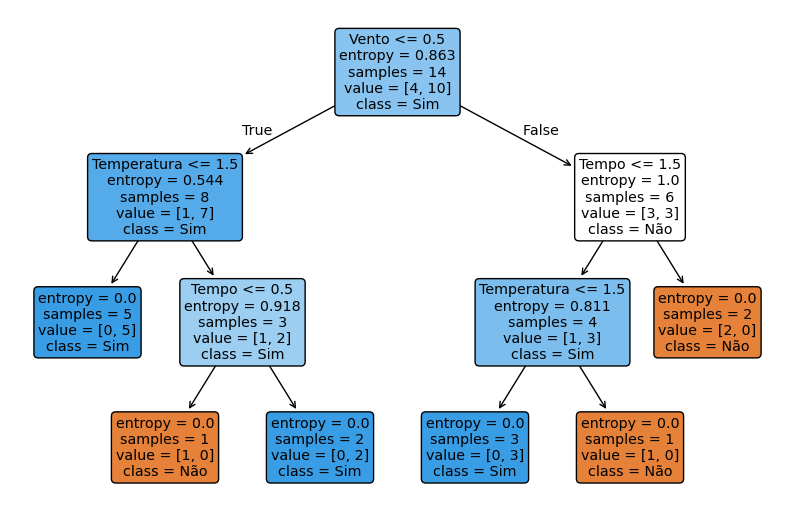

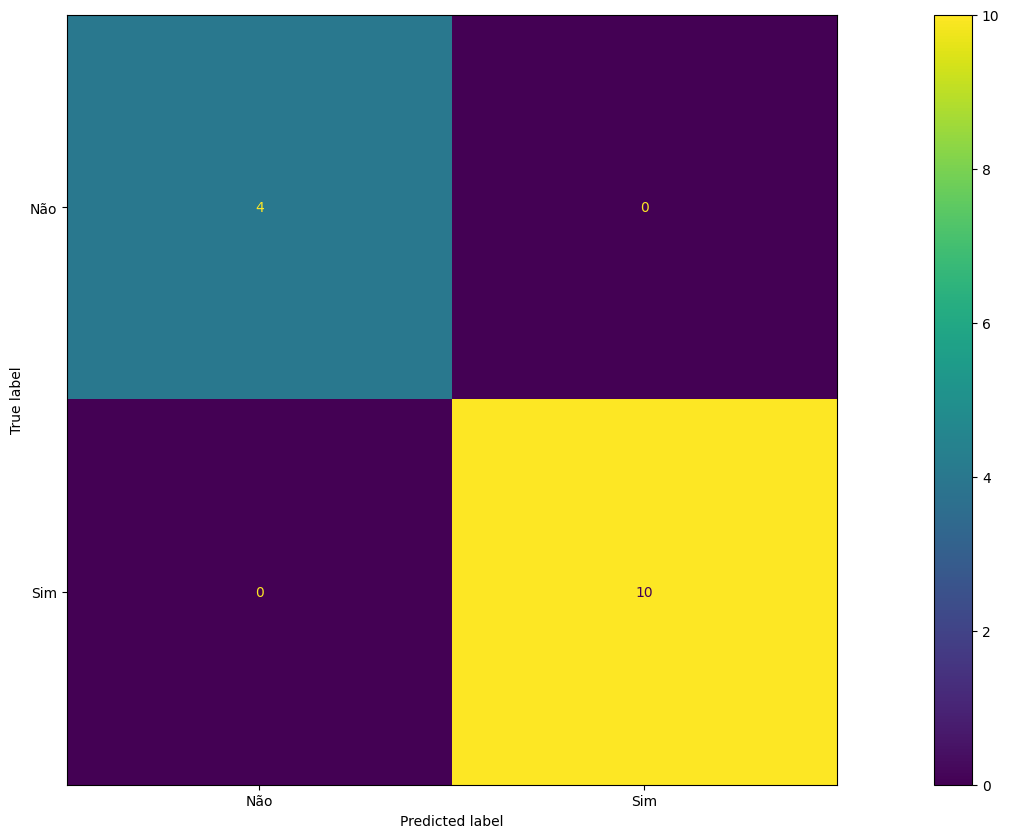

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from scipy.io import arff

# Carregando o arquivo ARFF
data, meta = arff.loadarff('./PartidaTenis.arff')

# Convertendo para DataFrame Pandas
df = pd.DataFrame(data)

# Convertendo colunas para valores numéricos
for col in df.columns:
    df[col] = df[col].astype(int)

# Definição de features e target
tempo = np.asarray(df['Tempo']).reshape(-1,1)
temperatura = np.asarray(df['Temperatura']).reshape(-1,1)
umidade = np.asarray(df['Umidade']).reshape(-1,1)
vento = np.asarray(df['Vento']).reshape(-1,1)
features = np.concatenate((tempo, temperatura, umidade, vento), axis=1)
target = df['Partida']

# Criando e treinando a Árvore de Decisão
Arvore = DecisionTreeClassifier(criterion='entropy').fit(features, target)

# Plotando a Árvore de Decisão
plt.figure(figsize=(10, 6.5))
tree.plot_tree(Arvore, feature_names=['Tempo', 'Temperatura', 'Umidade', 'Vento'], class_names=['Não', 'Sim'],
               filled=True, rounded=True)
plt.show()

# Gerando a Matriz de Confusão
fig, ax = plt.subplots(figsize=(25, 10))
metrics.ConfusionMatrixDisplay.from_estimator(Arvore, features, target, display_labels=['Não', 'Sim'], values_format='d', ax=ax)
plt.show()


# Nova seção